**1. In this exercise, we will build a LSTM model to estimate the weekly reported cases of rotavirus disease. You should solve the problem based on `case.csv` file that I uploaded at LearnUs. When you build your own LSTM model, you can follow the procedure that we learned in the stock price prediction example (`TATA.ipynb`).**

**(a) The case.csv data set includes the number of reported cases of rotavirus disease from December 23, 2009 to March 31, 2012 (118 weeks). Draw the time series plot of the reported cases and explain the pattern of the plot (20 points).**

In [1]:
# library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
# load data
dataset = pd.read_csv('case.csv', header = None)

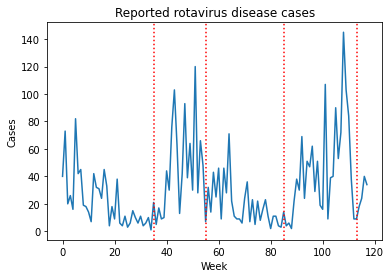

In [3]:
# time series plot
plt.plot(dataset)
plt.title('Reported rotavirus disease cases')
plt.xlabel('Week')
plt.ylabel('Cases')
plt.axvline(x=35, color='red', linestyle=':')
plt.axvline(x=55, color='red', linestyle=':')
plt.axvline(x=85, color='red', linestyle=':')
plt.axvline(x=113, color='red', linestyle=':')
plt.show()

Rotavirus 그래프는 크게 보면 첫 35주동안 감소하다가 55번째 주까지 증가하고, 다시 85번째 주까지 감소했다가 증가하는 양상을 보이고 있다. 약 20~30의 주기로 증가와 감소가 반복되는데, 118주에 대한 자료만 나타나 있어 확실하진 않지만 대략 113번째 주부터 값들이 감소할 것으로 예상할 수 있다.

**(b) Construct a LSTM model to estimate the reported cases by using the previous 30
weeks' information. Compare the estimated and true reported cases (20 points).**

In [4]:
# scaling
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [5]:
# 30 timesteps
X_train_30 = []
y_train_30 = []
for i in range(30, 118):
    X_train_30.append(dataset_scaled[i-30:i, 0])
    y_train_30.append(dataset_scaled[i, 0])
X_train_30, y_train_30 = np.array(X_train_30), np.array(y_train_30)
X_train_30 = np.reshape(X_train_30, (X_train_30.shape[0], X_train_30.shape[1], 1))
X_train_30.shape, y_train_30.shape

((88, 30, 1), (88,))

In [6]:
# LSTM model(input shape = 30)
model30 = Sequential()
model30.add(LSTM(units = 50, return_sequences = True, input_shape = (30, 1)))
model30.add(Dropout(0.2))
model30.add(LSTM(units = 50, return_sequences = True))
model30.add(Dropout(0.2))
model30.add(LSTM(units = 50, return_sequences = True))
model30.add(Dropout(0.2))
model30.add(LSTM(units = 50))
model30.add(Dropout(0.2))
model30.add(Dense(units = 1))

In [7]:
# model compile
model30.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [8]:
# model fit
model30.fit(X_train_30, y_train_30, epochs = 100)

Epoch 1/100
3/3 [==============================] - 0s 96ms/step - loss: 0.0800
Epoch 2/100
3/3 [==============================] - 0s 81ms/step - loss: 0.0556
Epoch 3/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0512
Epoch 4/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0467
Epoch 5/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0467
Epoch 6/100
3/3 [==============================] - 0s 60ms/step - loss: 0.0444
Epoch 7/100
3/3 [==============================] - 0s 66ms/step - loss: 0.0444
Epoch 8/100
3/3 [==============================] - 0s 66ms/step - loss: 0.0433
Epoch 9/100
3/3 [==============================] - 0s 59ms/step - loss: 0.0428
Epoch 10/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0422
Epoch 11/100
3/3 [==============================] - 0s 59ms/step - loss: 0.0432
Epoch 12/100
3/3 [==============================] - 0s 63ms/step - loss: 0.0423
Epoch 13/100
3/3 [==============================]

In [9]:
# prediction & unscaling
pred30 = model30.predict(X_train_30)
pred30 = sc.inverse_transform(pred30)

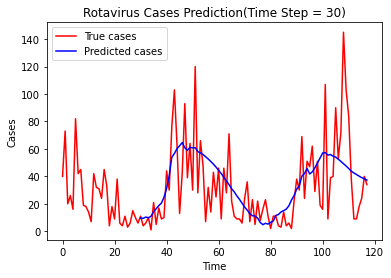

In [10]:
plt.plot(dataset, color = 'red', label = 'True cases')
plt.plot(range(30, 118), pred30, color = 'blue', label = 'Predicted cases')
plt.title('Rotavirus Cases Prediction(Time Step = 30)')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.legend()
plt.show()

30번째 주 이후로 예측한 그래프다. (a)에서 35번째 주부터 값들이 증가했다가 55번째주부터 감소, 85번째 주부터 다시 증가하는 양상을 보인다고 했는데, LSTM으로 예측한 그래프에서도 비슷한 지점에서 증가와 감소가 반복되는 걸 확인할 수 있다. 다만 짧은 주기의 위아래로 진동하는 모양은 완화됐으며, 큰 주기만 나타나고 있다. 해당 예측의 MSE loss는 0.0322다.

**(c) Construct a LSTM model to estimate the reported cases by using the previous 60 weeks' information. Compare the estimated and true reported cases (20 points).**

In [11]:
# 60 timesteps
X_train_60 = []
y_train_60 = []
for i in range(60, 118):
    X_train_60.append(dataset_scaled[i-60:i, 0])
    y_train_60.append(dataset_scaled[i, 0])
X_train_60, y_train_60 = np.array(X_train_60), np.array(y_train_60)
X_train_60 = np.reshape(X_train_60, (X_train_60.shape[0], X_train_60.shape[1], 1))
X_train_60.shape, y_train_60.shape

((58, 60, 1), (58,))

In [12]:
# LSTM model(input shape = 60)
model60 = Sequential()
model60.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 1)))
model60.add(Dropout(0.2))
model60.add(LSTM(units = 50, return_sequences = True))
model60.add(Dropout(0.2))
model60.add(LSTM(units = 50, return_sequences = True))
model60.add(Dropout(0.2))
model60.add(LSTM(units = 50))
model60.add(Dropout(0.2))
model60.add(Dense(units = 1))

In [13]:
# model compile & fit
model60.compile(optimizer = 'adam', loss = 'mean_squared_error')
model60.fit(X_train_60, y_train_60, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 75ms/step - loss: 0.0738
Epoch 2/100
2/2 [==============================] - 0s 62ms/step - loss: 0.0487
Epoch 3/100
2/2 [==============================] - 0s 65ms/step - loss: 0.0567
Epoch 4/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0477
Epoch 5/100
2/2 [==============================] - 0s 59ms/step - loss: 0.0470
Epoch 6/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0490
Epoch 7/100
2/2 [==============================] - 0s 59ms/step - loss: 0.0475
Epoch 8/100
2/2 [==============================] - 0s 58ms/step - loss: 0.0443
Epoch 9/100
2/2 [==============================] - 0s 60ms/step - loss: 0.0431
Epoch 10/100
2/2 [==============================] - 0s 60ms/step - loss: 0.0423
Epoch 11/100
2/2 [==============================] - 0s 59ms/step - loss: 0.0423
Epoch 12/100
2/2 [==============================] - 0s 57ms/step - loss: 0.0434
Epoch 13/100
2/2 [==============================]

In [14]:
# prediction & unscaling
pred60 = model60.predict(X_train_60)
pred60 = sc.inverse_transform(pred60)

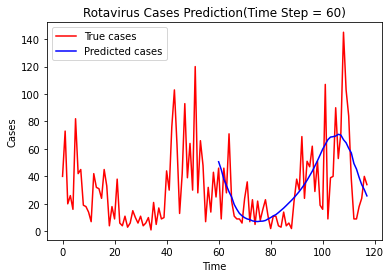

In [15]:
plt.plot(dataset, color = 'red', label = 'True cases')
plt.plot(range(60, 118), pred60, color = 'blue', label = 'Predicted cases')
plt.title('Rotavirus Cases Prediction(Time Step = 60)')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.legend()
plt.show()

60번째 주 이후로 예측한 그래프다. (a)에서 85번째 주까지 감소, 그 이후에 증가가 나타나고 113번째 주부터 감소할 것이라 예상했듯이, 감소-증가-감소 모양이 나타났다. 감소 -> 증가 지점은 85번째보다는 이른 70대에 존재하고, 증가 -> 감소 지점은 113번째보다 이른 100대에 존재한다. (b)의 그래프보다 자잘한 주기가 더 많이 제거된 부드러운 모양이 되었다. MSE loss는 0.0261이다.

**(d) Construct a LSTM model to estimate the reported cases by using the previous 90 weeks' information. Compare the estimated and true reported cases (20 points).**

In [16]:
# 90 timesteps
X_train_90 = []
y_train_90 = []
for i in range(90, 118):
    X_train_90.append(dataset_scaled[i-90:i, 0])
    y_train_90.append(dataset_scaled[i, 0])
X_train_90, y_train_90 = np.array(X_train_90), np.array(y_train_90)
X_train_90 = np.reshape(X_train_90, (X_train_90.shape[0], X_train_90.shape[1], 1))
X_train_90.shape, y_train_90.shape

((28, 90, 1), (28,))

In [17]:
# LSTM model(input shape = 90)
model90 = Sequential()
model90.add(LSTM(units = 50, return_sequences = True, input_shape = (90, 1)))
model90.add(Dropout(0.2))
model90.add(LSTM(units = 50, return_sequences = True))
model90.add(Dropout(0.2))
model90.add(LSTM(units = 50, return_sequences = True))
model90.add(Dropout(0.2))
model90.add(LSTM(units = 50))
model90.add(Dropout(0.2))
model90.add(Dense(units = 1))

In [18]:
# model compile & fit
model90.compile(optimizer = 'adam', loss = 'mean_squared_error')
model90.fit(X_train_90, y_train_90, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1642
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1352
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1111
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0843
Epoch 5/100
1/1 [==============================] - 0s 924us/step - loss: 0.0719
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0809
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0722
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0619
Epoch 10/100
1/1 [==============================] - 0s 998us/step - loss: 0.0583
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 13/100
1/1 [==============================] - 0s 2m

In [19]:
# prediction & unscaling
pred90 = model90.predict(X_train_90)
pred90 = sc.inverse_transform(pred90)

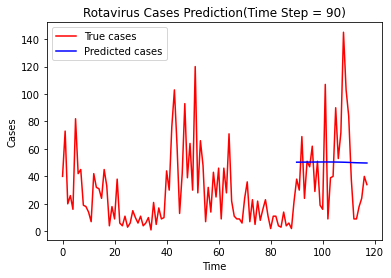

In [20]:
plt.plot(dataset, color = 'red', label = 'True cases')
plt.plot(range(90, 118), pred90, color = 'blue', label = 'Predicted cases')
plt.title('Rotavirus Cases Prediction(Time Step = 90)')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.legend()
plt.show()

90번째 주 이후로 예측한 그래프다. 118개의 데이터 중 90개 주를 예측에 사용하다 보니 28개 주에 대한 예측값만 나타나 예측 그래프 자체가 짧기도 하고, 모양이 원 그래프와 많이 다른 걸로 보아 정확도도 많이 떨어진다. MSE loss는 0.0513이다.

**(e) Compare the accuracy between LSTM models in (b), (c), (d). Which one is the best? Explain the reason why (20 points).**

(b), (c), (d) 모델들의 MSE loss 값은 각각0.0322, 0.0261, 0.0513으로 계산됐다. Loss값이 가장 작은 (c) 모델, 즉 60개 주의 정보를 이용한 모델이 가장 우수한 모델이라고 판단할 수 있다.

In [29]:
from sklearn.metrics import mean_squared_error as mse
mse(dataset[30:], pred30), mse(dataset[60:], pred60), mse(dataset[90:], pred90)

(593.5193653351675, 550.7644100150773, 1071.849790587484)

Scaling된 값이 아니라 최종 예측값을 이용해 계산한 MSE도 (c)의 모델이 가장 낮은 값을 나타낸다.